<a href="https://colab.research.google.com/github/Christopher-Ramirez-S/An-lisis-de-datos/blob/Eldon/graficos_raph_eldon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
import requests
import json
import concurrent.futures
import threading
import time
import logging
import os
from tqdm import tqdm
import datetime
import pandas as pd
import csv
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv')
data = pd.DataFrame(df)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1 Película más vieja
#objetivo: Descubrir cual es la película más vieja con fecha de lanzamiento
data['release_date']=pd.to_datetime(data['release_date'],errors='coerce') #remplaza con Not a time los que no tienen dates
data_con_fechas = data.dropna(subset=['release_date'])
pelicula_vieja = data_con_fechas[data_con_fechas['release_date'] == data_con_fechas['release_date'].min()]
print("Pelicula mas vieja")
print(pelicula_vieja)
print("fecha de lanzamiento")
print(data['release_date'])

Pelicula mas vieja
             id                                title  vote_average  \
603006  1294302  בראול סטארס בחיים האמיתיים-אלון קאט           0.0   

        vote_count    status release_date    revenue  runtime  adult  \
603006           0  Released   1800-01-01  100000000        0  False   

       backdrop_path  ...                       original_title overview  \
603006           NaN  ...  בראול סטארס בחיים האמיתיים-אלון קאט      NaN   

       popularity                       poster_path tagline  \
603006        0.6  /bCKTrWbglTHpTgl3crAhHZg7TgK.jpg     NaN   

                                       genres  production_companies  \
603006  Horror, Drama, Thriller, Mystery, War            Salty Fish   

       production_countries spoken_languages keywords  
603006                  NaN              NaN      NaN  

[1 rows x 24 columns]
fecha de lanzamiento
0        2010-07-15
1        2014-11-05
2        2008-07-16
3        2009-12-15
4        2012-04-25
            ...   

In [ ]:
#2 filtro de datos de 1910
# objetivo: Filtrar las fechas para poder hacer la investigación desde 1910 hasta 2024
start_date = pd.to_datetime('1910-01-01')
end_date = pd.to_datetime('2024-07-31')
filtered_data = data[(data['release_date'] >= start_date) & (data['release_date'] <= end_date)]
filtered_data

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642753,1151019,"Cum Inside Me, White Boy",0.000,0,Released,2009-09-24,0,181,True,NaN,...,"Cum Inside Me, White Boy",These 5 white boys have got to be the luckiest...,0.000,/asYJoRUvkobuMtkQjKXoQ5PboAm.jpg,NaN,NaN,Mayhem XXX,United States of America,English,NaN
642754,1151020,Mute,0.000,0,Released,2021-11-05,0,23,False,NaN,...,Mute,"Monette, a recently separated travelling book ...",0.903,NaN,Confession is good for the soul.,"Horror, Mystery, Thriller, Drama",Pendle Films,NaN,NaN,"murder, hitchhiker, true crime, road movie, gr..."
642756,1151022,Once Upon a Slice in the West,0.000,0,Released,2022-09-04,0,1,False,NaN,...,Once Upon a Slice in the West,"In an old warehouse, a celebration among a gan...",0.600,/1RynGzGBqk9oPwcUAtL7V0kekt2.jpg,NaN,"Comedy, Western, Crime","Pendle Films, Parcel Face Productions",NaN,NaN,"gangster, pizza, standoff, western, characters"
642758,1151002,Mixtape,0.000,0,Released,2022-04-07,0,86,False,/gxocYqZbYLzQT9PzODuXQV8jgJ5.jpg,...,Mixtape,Mixtapes have an out-sized role in the emergen...,1.905,/6E0rQZ96Mc6fqGvfW7sbsChdVlQ.jpg,Never Play By The Rules,Documentary,NaN,NaN,English,NaN


In [ ]:
#3 Sacar las 10 peliculas con mayor votacion en todos los años
# objetivo: ver las películas mayor votadas para tener una idea de las mejores películas

MayorVot=filtered_data.sort_values(by='vote_count',ascending=False)
MayorVot.head(10)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
5,293660,Deadpool,7.606,28894,Released,2016-02-09,783100000,108,False,/en971MEXui9diirXlogOrPKmsEn.jpg,...,Deadpool,The origin story of former Special Forces oper...,72.735,/zq8Cl3PNIDGU3iWNRoc5nEZ6pCe.jpg,Witness the beginning of a happy ending.,"Action, Adventure, Comedy","20th Century Fox, The Donners' Company, Genre ...",United States of America,English,"superhero, anti hero, mercenary, based on comi..."
6,299536,Avengers: Infinity War,8.255,27713,Released,2018-04-25,2052415039,149,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,...,Avengers: Infinity War,As the Avengers and their allies have continue...,154.340,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,An entire universe. Once and for all.,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa","sacrifice, magic, superhero, based on comic, s..."
7,550,Fight Club,8.438,27238,Released,1999-10-15,100853753,139,False,/hZkgoQYus5vegHoetLkCJzb17zJ.jpg,...,Fight Club,A ticking-time-bomb insomniac and a slippery s...,69.498,/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg,Mischief. Mayhem. Soap.,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,"dual identity, rage and hate, based on novel o..."
8,118340,Guardians of the Galaxy,7.906,26638,Released,2014-07-30,772776600,121,False,/uLtVbjvS1O7gXL8lUOwsFOH4man.jpg,...,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",33.255,/r7vmZjiyZw9rpJMQJdXpjgiCOk9.jpg,All heroes start somewhere.,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,"spacec

Lab-4 formula

Estudiantes:
Adrian Rodriguez Rodriguez,
Christopher Ramirez Suarez,
Aaron Navarro Balmaceda,
Rafael Garcia Delgado,
eldon caldwell salazar,


Funcion a retornar conjunto de datos


In [ ]:
#4 funciones de lab 4 vistas en clase
# objetivo: mostrar datos de la columna seleccionada, con esto podemos saber los géneros a detalle
def mostrar_datos(df, columna):
  print(df[columna])

mostrar_datos(df, 'genres')

0                  Action, Science Fiction, Adventure
1                   Adventure, Drama, Science Fiction
2                      Drama, Action, Crime, Thriller
3         Action, Adventure, Fantasy, Science Fiction
4                  Science Fiction, Action, Adventure
                             ...                     
642756                         Comedy, Western, Crime
642757                                            NaN
642758                                    Documentary
642759                                    Documentary
642760                                            NaN
Name: genres, Length: 642761, dtype: object


Funcion que devulve la ubicacion de los elementos de la busqueda

In [ ]:
#5 buscar elementos
# objetivo: buscar las películas del género "Action" ya que fue de los más votados en la funcion '3' de la investigación
#   y luego contar cuantas películas hay con ese género
def getIndexes(dfObj, value):
    listOfPos = []
    result = dfObj.isin([value])
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)

    for col in columnNames:
        rows = list(result[col][result[col] == True].index)

        for row in rows:
            listOfPos.append((row, col))

    return listOfPos
listOfPositions = getIndexes(filtered_data, 'Action')

print(f"Primeras 20 index posiciones de 'Action' en Dataframe:")
lista = listOfPositions[:20]
for i in range(len(lista)):
    print(lista[i])

count = len(listOfPositions)
print(f"Número de películas de'Action': {count}")




Primeras 20 index posiciones de 'Action' en Dataframe:
(62548, 'title')
(68549, 'title')
(201791, 'title')
(330406, 'title')
(448902, 'title')
(457914, 'title')
(630037, 'title')
(636880, 'title')
(62548, 'original_title')
(448902, 'original_title')
(457914, 'original_title')
(630037, 'original_title')
(636880, 'original_title')
(261179, 'tagline')
(530730, 'tagline')
(2528, 'genres')
(2944, 'genres')
(3145, 'genres')
(3324, 'genres')
(3795, 'genres')
Número de películas de'Action': 4883


In [ ]:
#6 Distribución de géneros a lo largo de las décadas (1910-2024):
#Objetivo: Identificar cómo han cambiado las preferencias de género a lo largo de las décadas.
#.loc para modificar el dataframe de forma segura
# Filtrar las fechas entre 1910 y 2024
start_date = pd.to_datetime('1910-01-01')
end_date = pd.to_datetime('2024-07-31')
filtered_data = data[(data['release_date'] >= start_date) & (data['release_date'] <= end_date)]
filtered_data.loc[:, 'release_date']= pd.to_datetime(filtered_data['release_date'], errors='coerce')  # Convertir fechas

# Elimina cualquier valor faltante de la columna 'release_date'
filtered_data = filtered_data.dropna(subset=['release_date'])


# Filtrar solo las columnas relevantes
filtered_data = filtered_data[['release_date', 'genres', 'title']].copy()

# Crear una nueva columna 'decade' que representa la década de la película
filtered_data.loc[:, 'decade'] = (filtered_data['release_date'].dt.year // 10) * 10

# Separar los géneros en múltiples filas para cada película (en caso de que tengan más de un género)
filtered_data = filtered_data.assign(genres=filtered_data['genres'].str.split(',')).explode('genres')

# Eliminar espacios adicionales
filtered_data.loc[:, 'genres'] = filtered_data['genres'].str.strip()

# Agrupar por década y género, contando el número de películas
genre_by_decade = filtered_data.groupby(['decade', 'genres'])['title'].count().reset_index(name='movie_count')

# Imprimir solo los resultados que están dentro del rango 1910-2024
#print(genre_by_decade[(genre_by_decade['decade'] >= 1910) & (genre_by_decade['decade'] <= 2024)])
genre_by_decade = genre_by_decade[(genre_by_decade['decade'] >= 1910) & (genre_by_decade['decade'] <= 2024)]
genre_by_decade

,decade,genres,movie_count
0,1910,Action,76
1,1910,Adventure,161
2,1910,Animation,206
3,1910,Comedy,1542
4,1910,Crime,184
...,...,...,...
221,2020,Science Fiction,3385
222,2020,TV Movie,2874
223,2020,Thriller,8300
224,2020,War,720


In [ ]:
#7 Promedio de ingresos (revenue) por género a lo largo del tiempo:

#Objetivo: Ver cómo han cambiado los ingresos medios generados por películas de diferentes géneros.
# Filtrar las fechas entre 1910 y 2023
start_date = pd.to_datetime('1910-01-01')
end_date = pd.to_datetime('2023-12-31')
filtered_data = data[(data['release_date'] >= start_date) & (data['release_date'] <= end_date)]
filtered_data.loc[:, 'release_date']= pd.to_datetime(filtered_data['release_date'], errors='coerce')  # Convertir fechas

# Elimina cualquier valor faltante de la columna 'release_date'
filtered_data = filtered_data.dropna(subset=['release_date'])

# Filtrar solo las columnas relevantes
filtered_data = filtered_data[['release_date', 'genres', 'title', 'revenue']].copy()  # Asegúrate de incluir 'revenue'

# Crear una nueva columna 'decade' que representa la década de la película
filtered_data.loc[:, 'decade'] = (filtered_data['release_date'].dt.year // 10) * 10

# Separar los géneros en múltiples filas para cada película
filtered_data = filtered_data.assign(genres=filtered_data['genres'].str.split(',')).explode('genres')

# Eliminar espacios en blanco adicionales en la columna 'genres'
filtered_data['genres'] = filtered_data['genres'].str.strip()

# Asegurarse de que la columna 'revenue' es numérica
filtered_data['revenue'] = pd.to_numeric(filtered_data['revenue'], errors='coerce')

# Agrupar por década y género para calcular el promedio de ingresos
revenue_by_genre = filtered_data.groupby(['decade', 'genres'])['revenue'].mean().reset_index(name='average_revenue')

# Encontrar el género con el mayor promedio de ingresos por cada década
max_revenue_genre_by_decade = revenue_by_genre.loc[revenue_by_genre.groupby('decade')['average_revenue'].idxmax()]

# Ordenar por década de forma ascendente
max_revenue_genre_by_decade = max_revenue_genre_by_decade.sort_values(by='decade')

# Formatear los números con dos decimales
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Mostrar floats con 2 decimales

# Mostrar el resultado
max_revenue_genre_by_decade


,decade,genres,average_revenue
14,1910,Science Fiction,250000.00
34,1920,War,367046.08
53,1930,War,1899790.17
62,1940,Family,1340965.03
82,1950,Fantasy,1595531.75
94,1960,Adventure,1376102.65
126,1970,Science Fiction,4004130.02
132,1980,Adventure,7024158.52
151,1990,Adventure,16817311.05
170,2000,Adventure,31986811.70


In [ ]:
#8 Películas más votadas por género (top):

#Objetivo: Encontrar las películas con más votos dentro de cada género.
filtered_data = data[['release_date', 'genres', 'title', 'revenue', 'vote_count']].copy() #se añadió "vote_count" al filtered data
# Separar los géneros en múltiples filas para cada película
filtered_data = filtered_data.assign(genres=filtered_data['genres'].str.split(',')).explode('genres')

# Eliminar espacios en blanco adicionales en la columna 'genres'
filtered_data['genres'] = filtered_data['genres'].str.strip()

# Asegurarse de que la columna 'vote_count' está en formato numérico
filtered_data['vote_count'] = pd.to_numeric(filtered_data['vote_count'], errors='coerce')

# Obtener la película más votada por cada género (Top 1)
top_voted_movies_by_genre = filtered_data.groupby('genres').apply(lambda x: x.nlargest(1, 'vote_count'))[['title', 'genres', 'vote_count']]
# Resetear el índice para una visualización más limpia
top_voted_movies_by_genre = top_voted_movies_by_genre.reset_index(drop=True)

# Imprimir
top_voted_movies_by_genre


,title,genres,vote_count
0,Inception,Action,34495
1,Inception,Adventure,34495
2,Inside Out,Animation,19463
3,Deadpool,Comedy,28894
4,The Dark Knight,Crime,30619
5,Harry Potter 20th Anniversary: Return to Hogwarts,Documentary,3084
6,Interstellar,Drama,32571
7,Inside Out,Family,19463
8,Avatar,Fantasy,29815
9,The Imitation Game,History,15973


In [ ]:
#9 top 5 peliculas del género war
# objetivo: ver cuales son las 5 películas con más votos del segundo género más recaudado a lo largo de las decadas
top_5_war = filtered_data[(filtered_data['genres'] == 'War')].nlargest(5, 'vote_count')[['title', 'genres', 'vote_count', 'release_date']]
print("\nTop 5 War Movies:")
top_5_war


Top 5 War Movies:


,title,genres,vote_count,release_date
30,Inglourious Basterds,War,20746,2009-08-19
91,The Imitation Game,War,15973,2014-11-14
102,Dunkirk,War,15464,2017-07-19
116,Saving Private Ryan,War,14658,1998-07-24
119,Schindler's List,War,14594,1993-12-15


In [ ]:
#10 top 5 peliculas del genero adventure
# objetivo: ver cuales son las 5 películas con más votos del género más recaudado a lo largo de las decadas
top_5_adventure = filtered_data[(filtered_data['genres'] == 'Adventure')].nlargest(5, 'vote_count')[['title', 'genres', 'vote_count', 'release_date']]


print("Top 5 Adventure Movies:")
top_5_adventure


Top 5 Adventure Movies:


,title,genres,vote_count,release_date
0,Inception,Adventure,34495,2010-07-15
1,Interstellar,Adventure,32571,2014-11-05
3,Avatar,Adventure,29815,2009-12-15
4,The Avengers,Adventure,29166,2012-04-25
5,Deadpool,Adventure,28894,2016-02-09


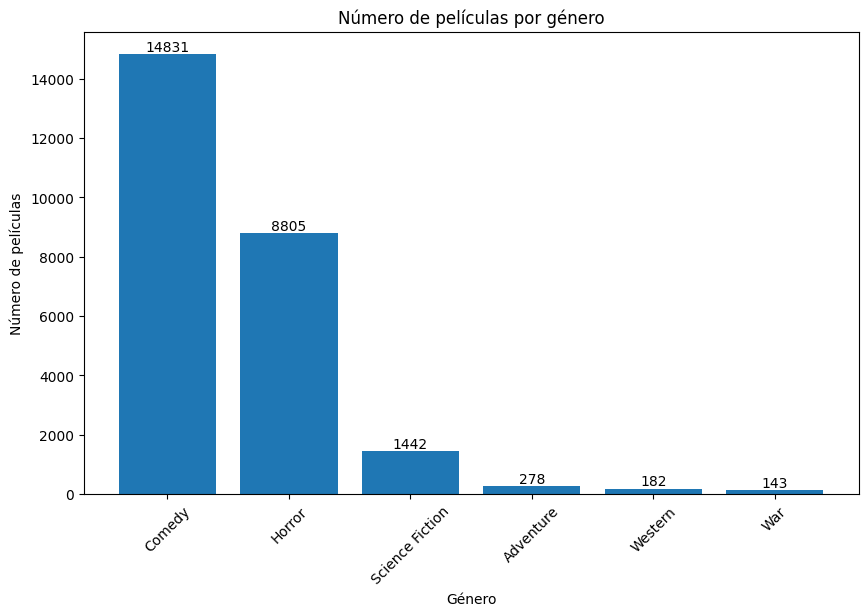

In [18]:
# graficos histograma usando matplotlib, que demuestre cuantas peliculas se han realizado por genero
import pandas as pd
import matplotlib.pyplot as plt

# Poner los géneros de interés
genres = ['Adventure', 'War', 'Science Fiction','Comedy','Western','Horror']

# Filter data for selected genres
filtered_genres = filtered_data[filtered_data['genres'].isin(genres)]

# Count movies per genre
conteo_generos = filtered_genres['genres'].value_counts()

# Crear histograma
plt.figure(figsize=(10, 6))
plt.bar(conteo_generos.index, conteo_generos.values)
#plt.hist(filtered_genres['genres'], bins=len(genres), edgecolor='black')
plt.title('Número de películas por género')
plt.xlabel('Género')
plt.ylabel('Número de películas')
plt.xticks(rotation=45) # mejora la visualización por las layers largas
# Agregar el número exacto de películas en cada barra
for i, v in enumerate(conteo_generos.values):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom')
plt.show()

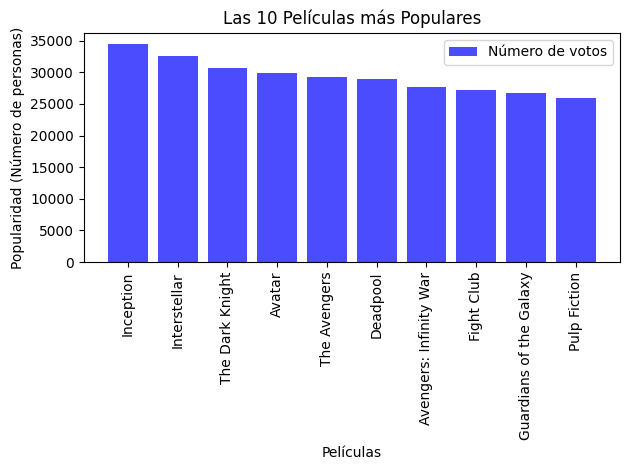

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = '/content/drive/MyDrive/datasets/TMDB_movie_dataset_v11.csv'
data = pd.read_csv(file_path)

# Convertir la columna 'release_date' a formato de fecha
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Filtrar las películas para eliminar las que no tienen popularidad y aquellas que sean para adultos
#filtered_data = data[(data['adult'] == False) & (data['title'] != 'Yua Mikami')].dropna(subset=['vote_count'])

# Ordenar por popularidad y seleccionar las 10 películas más populares
top_10_movies = filtered_data.sort_values(by='vote_count', ascending=False).head(10)

# Obtener los títulos de las películas más populares
x = top_10_movies['title']

# Obtener los valores de popularidad de las películas más populares
y = top_10_movies['vote_count']

# Crear el gráfico de barras
plt.bar(x, y, label='Número de votos', color='b', alpha=0.7)

# Personalización del gráfico
plt.xlabel('Películas')
plt.ylabel('Popularidad (Número de personas)')
plt.title('Las 10 Películas más Populares')
plt.xticks(rotation=90)  # Rotar los títulos de las películas para mejor visibilidad
plt.legend()

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para que los títulos no se sobrepongan
plt.show()